In [127]:
!git clone https://github.com/lfunderburk/stats_can

fatal: destination path 'stats_can' already exists and is not an empty directory.


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can Notebook Template</h1>

<h4 align='center'>Author $\mid$ Grade $\mid$ Explored Dataset</h4>

<h2 align='center'>Abstract</h2>

In this notebook we explore dataset ................................... (provide dataset name). Data was collected between ................................... (provide dataset start date) and ................................... (provide dataset end date). 


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import widgets, interact, interact_manual, Button, Layout
from IPython.display import Javascript, display

def table_of_cont(boolean_val):
    
    if boolean_val == True:

        fig = plt.figure(figsize=(20,18))

        table_of_contents = ["Table of Contents","Selecting a Dataset: From Series List", \
                     "Selecting a Dataset: From Statistics Canada Website","Conclusion","References"]
        number_of_items = len(table_of_contents)

        ax = fig.add_subplot(331)
        ax.axis("Off")
        ax.invert_yaxis()
        for i in range(number_of_items):
            if i==0:
                ax.text(0,i/5,table_of_contents[i],fontsize=25)
    
            else:
                ax.text(0,i/5,table_of_contents[i],fontsize=18)
    
    
        ax1 = fig.add_subplot(332)
        ax1.axis("Off")


        ax2 = fig.add_subplot(333)
        ax2.axis("Off")

        plt.show()


        
long_name = {'description_width': 'initial'}
show_table_button = widgets.Button(
    value=True,
    description='Show Table of Contents',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    style=long_name,
    icon='check'
)

def run_current(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+0,IPython.notebook.get_selected_index()+1)'))   


ai_button_show = widgets.Button(button_style='info',description="Show Table of Contents", layout=Layout(width='25%', height='30px') )
ai_button_hide = widgets.Button(button_style='info',description="Hide Table of Contents", layout=Layout(width='25%', height='30px') )

In [21]:
button_ctr = 0

In [126]:
button_ctr += 1


if(button_ctr % 2 == 0):

    display(ai_button_hide)
    ai_button_hide.on_click( run_current )
    val = True
    table_of_cont(val)
    
    
    
else:

    display(ai_button_show)
    ai_button_show.on_click( run_current )
    val = False
    table_of_cont(val)

<IPython.core.display.Javascript object>

Button(button_style='info', description='Show Table of Contents', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

<h2 align='center'>Selecting a Dataset: From Series List</h2>

We pull all datasets updated today and reorganize study data by ProductID, Study Title (in English and French), Number of Datapoints, Start Date and End Data of study. 

In [25]:
### import stats_can
import datetime as dt
import pandas as pd
import stats_can
import json
from pprint import pprint

In [26]:
%run -i ./stats_can/stats_can/scwds.py
%run -i ./stats_can/stats_can/sc.py

In [27]:
changed_series = get_changed_series_list()
changed_series_df = pd.DataFrame.from_dict(changed_series)

In [28]:
product_ids = list(set([item for item in changed_series_df["productId"]]))

In [29]:
metadata= [get_cube_metadata(str(item)) for item in product_ids]

In [30]:
title_en = []
title_fr = []
start_d = []
end_d = []
nbDatapoints = []
for item in metadata:
    title_en.append(item[0]["cubeTitleEn"])
    title_fr.append(item[0]["cubeTitleFr"])
    start_d.append(item[0]["cubeStartDate"])
    end_d.append(item[0]["cubeEndDate"])
    nbDatapoints.append(item[0]["nbDatapointsCube"])

In [57]:
datasets = {'ProductID': product_ids,
         'StudyTitleEnglish': title_en,
         'StudyTitleFrench': title_fr,
           'StartDate' : start_d,
           'EndDate' : end_d,
           'NumberOfDataPoints' : nbDatapoints}
df = pd.DataFrame(datasets)
cols = ['ProductID', 'StudyTitleEnglish','StudyTitleFrench','NumberOfDataPoints','StartDate', 'EndDate']
df = df[cols]


In [61]:
df

,ProductID,StudyTitleEnglish,StudyTitleFrench,NumberOfDataPoints,StartDate,EndDate
0,14100352,"Work stoppages in Canada, by jurisdiction and ...",Arrêts de travail au Canada selon la jurisdict...,147168,1946-01-01,2018-01-01
1,33100036,Daily average foreign exchange rates in Canadi...,Taux de change moyens quotidiens en dollars ca...,31346,1981-05-04,2018-11-14
2,36100486,"International investment position, foreign por...","Bilan des investissements internationaux, inve...",6636,1991-01-01,2018-09-01
3,10100132,"Fisher commodity price index, United States do...","Indice Fisher des prix des produits de base, é...",3934,1972-01-01,2018-10-01
4,10100138,"Selected United States dollar interest rates, ...",Quelques taux d'intérêt pratiqués aux États-Un...,26021,1954-07-07,2018-11-07
5,10100139,"Bank of Canada, money market and other interes...",Taux du marché monétaire et autres taux d'inté...,261525,1991-11-19,2018-11-15
6,16100012,"Manufacturing capacity utilization rates, by N...","Taux d'utilisation de la capacité fabrication,...",588,2017-01-01,2018-09-01
7,16100013,"Real manufacturing sales, orders, inventory ow...","Valeur réelle des ventes, des commandes, des s...",10452,2002-01-01,2018-09-01
8,10100143,"Fisher commodity price index, United States do...","Indice Fisher des prix des produits de base, é...",17122,1972-01-05,2018-11-14
9,10100145,"Financial market statistics, as at Wednesday, ...","Statistiques du marché financier, données du m...",122590,1957-01-02,2018-11-14


<h3 align='center'>Study Title</h3>


In this section we download and explore data for a specific study. Studies are selected based on the product ID. 

In [99]:
# # Download data 
productId = "16100012"

download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data
# Example
data = download_and_store_json("16100012")

In [84]:
keys_names = [item for item in data.keys()]
for i in range(len(keys_names)-3):
    print(str(keys_names[i]) + ":\t"+ str(data[keys_names[i]]))

responseStatusCode:	0
productId:	16100012
cansimId:	304-0017
cubeTitleEn:	Manufacturing capacity utilization rates, by North American Industry Classification System (NAICS)
cubeTitleFr:	Taux d'utilisation de la capacité fabrication, selon le Système de classification des industries de l'Amérique du Nord (SCIAN)
cubeStartDate:	2017-01-01
cubeEndDate:	2018-09-01
nbSeriesCube:	28
nbDatapointsCube:	588
archiveStatusCode:	2
archiveStatusEn:	CURRENT - a cube available to the public and that is current
archiveStatusFr:	ACTIF - un cube qui est disponible au public et qui est toujours mise a jour
subjectCode:	['1699']
surveyCode:	['2101']


<h3 align='center'>Compute pandas DataFrame of selected study</h3>

In [66]:
import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df

In [85]:
# Example, we will select the study we downloaded previously 

df = read_data_compute_df("16100012")
df

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Principal statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,NaN,Manufacturing,Capacity utilization rate,Percent,239,units,0,v122804837,1.1.1,78.9,NaN,NaN,NaN,1
1,2017-01,Canada,NaN,Non-durable goods industries,Capacity utilization rate,Percent,239,units,0,v122804838,1.2.1,81.1,NaN,NaN,NaN,1
2,2017-01,Canada,NaN,Food manufacturing,Capacity utilization rate,Percent,239,units,0,v122804839,1.3.1,74.8,NaN,NaN,NaN,1
3,2017-01,Canada,NaN,Beverage and tobacco product manufacturing,Capacity utilization rate,Percent,239,units,0,v122804840,1.4.1,75.0,NaN,NaN,NaN,1
4,2017-01,Canada,NaN,Beverage manufacturing,Capacity utilization rate,Percent,239,units,0,v122804841,1.5.1,78.2,NaN,NaN,NaN,1
5,2017-01,Canada,NaN,Tobacco manufacturing,Capacity utilization rate,Percent,239,units,0,v122804842,1.6.1,62.2,NaN,NaN,NaN,1
6,2017-01,Canada,NaN,Textile mills,Capacity utilization rate,Percent,239,units,0,v122804843,1.7.1,76.7,NaN,NaN,NaN,1
7,2017-01,Canada,NaN,Textile product mills,Capacity utilization rate,Percent,239,units,0,v122804844,1.8.1,65.6,NaN,NaN,NaN,1
8,2017-01,Canada,NaN,Clothing manufacturing,Capacity utilization rate,Percent,239,units,0,v122804845,1.9.1,79.1,NaN,NaN,NaN,1
9,2017-01,Canada,NaN,Leather and allied product manufacturing,Capacity utilization rate,Percent,239,units,0,v122804846,1.10.1,75.6,NaN,NaN,NaN,1


<h3 align='center'>Plot Data Subsets</h3>

Select specific aspects of data for a given time range.

In [86]:
df_20 = df[(df['REF_DATE'] >= '2017-01-01') & (df['REF_DATE'] <= '2018-11-15')]

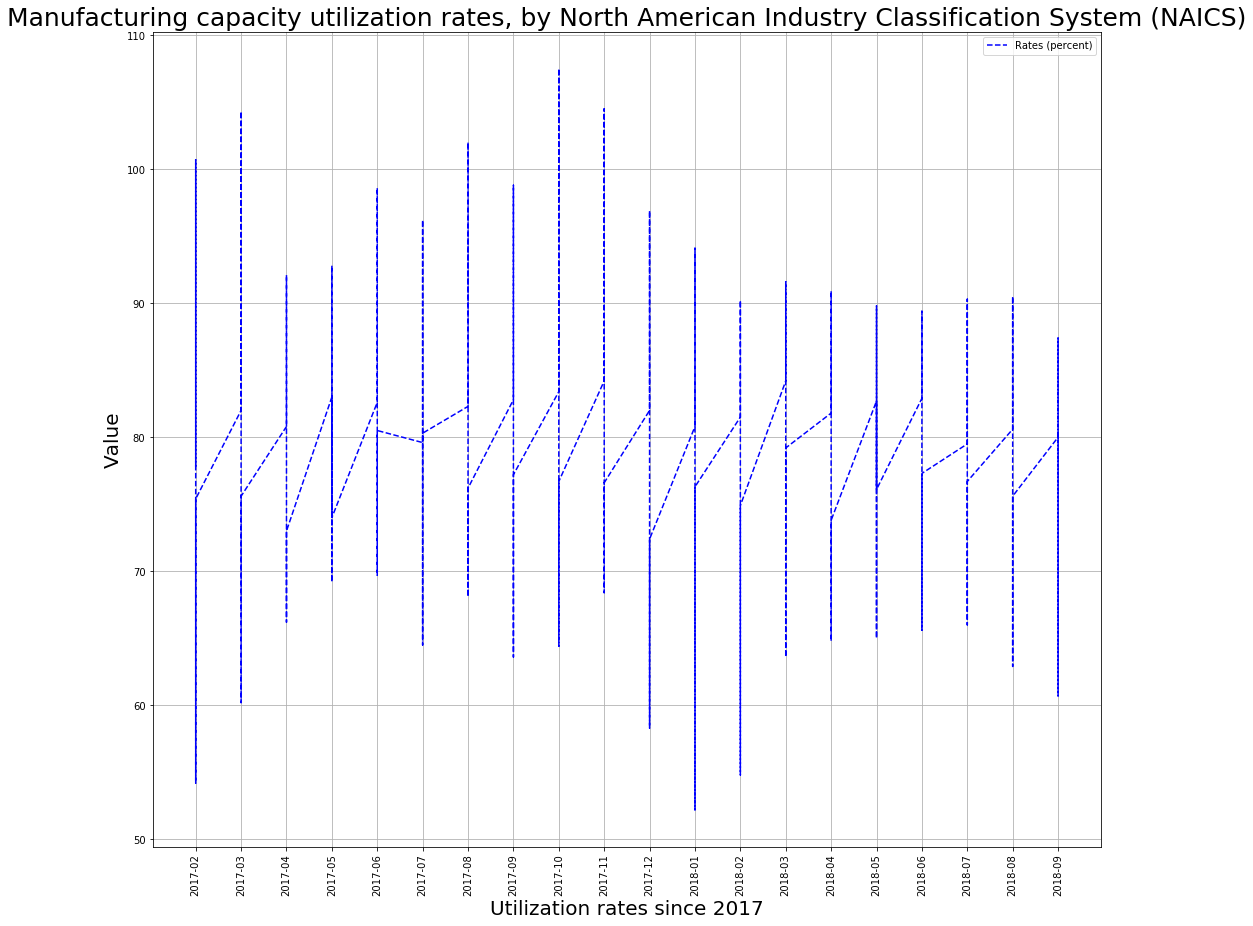

In [111]:
fig = plt.figure(facecolor='w',figsize=(17,15))
ax  = fig.add_subplot(111,facecolor = '#ffffff')

plt.plot(df_20["REF_DATE"],df_20["VALUE"],'b--',label='Rates (percent)')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Utilization rates since 2017', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title('Manufacturing capacity utilization rates, by \
North American Industry Classification System (NAICS)',fontsize=25)
legend = ax.legend()
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

<h2 align='center'>Selecting a Dataset: From Statistics Canada Website</h2>

Go to https://www150.statcan.gc.ca/n1/en/type/data?MM=1 and select any data set of interest. Copy and paste the value next to Tables. 


![Stats Canada Main Page](./Tables.png)

<h3 align='center'>Study Title</h3>


In this section we download and explore data for a specific study. Studies are selected based on the product ID. 

In [104]:
data2 = download_and_store_json("25100055")

keys_names2 = [item for item in data2.keys()]
for i in range(len(keys_names2)-3):
    print(str(keys_names2[i]) + ":\t"+ str(data2[keys_names2[i]]))

responseStatusCode:	0
productId:	25100055
cansimId:	131-0004
cubeTitleEn:	Supply and disposition of natural gas, monthly (data in thousands)
cubeTitleFr:	Approvisionnements et utilisations du gaz naturel, mensuel (données en milliers)
cubeStartDate:	2016-01-01
cubeEndDate:	2018-08-01
nbSeriesCube:	162
nbDatapointsCube:	5184
archiveStatusCode:	2
archiveStatusEn:	CURRENT - a cube available to the public and that is current
archiveStatusFr:	ACTIF - un cube qui est disponible au public et qui est toujours mise a jour
subjectCode:	['2501', '2502', '380405']
surveyCode:	['2198']


<h3 align='center'>Compute pandas DataFrame of selected study</h3>

In [105]:
df2 = read_data_compute_df("25100055")
df2

,REF_DATE,GEO,DGUID,Supply and disposition,Unit of measure,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2016-01,Canada,2016A000011124,Gross withdrawals,Cubic metres,Cubic metres,72,thousands,3,v107638454,1.1.1,17467233.8,NaN,NaN,NaN,1
1,2016-01,Canada,2016A000011124,Gross withdrawals,Gigajoules,Gigajoules,143,thousands,3,v107638455,1.1.2,681047.4,NaN,NaN,NaN,1
2,2016-01,Canada,2016A000011124,Marketable production,Cubic metres,Cubic metres,72,thousands,3,v107638456,1.2.1,13701303.0,NaN,NaN,NaN,1
3,2016-01,Canada,2016A000011124,Marketable production,Gigajoules,Gigajoules,143,thousands,3,v107638457,1.2.2,534213.8,NaN,NaN,NaN,1
4,2016-01,Canada,2016A000011124,Imports,Cubic metres,Cubic metres,72,thousands,3,v107638458,1.3.1,1785458.1,NaN,NaN,NaN,1
5,2016-01,Canada,2016A000011124,Imports,Gigajoules,Gigajoules,143,thousands,3,v107638459,1.3.2,69615.0,NaN,NaN,NaN,1
6,2016-01,Canada,2016A000011124,Residential consumption,Cubic metres,Cubic metres,72,thousands,3,v107638460,1.4.1,2721787.7,NaN,NaN,NaN,1
7,2016-01,Canada,2016A000011124,Residential consumption,Gigajoules,Gigajoules,143,thousands,3,v107638461,1.4.2,104940.5,NaN,NaN,NaN,1
8,2016-01,Canada,2016A000011124,Industrial consumption,Cubic metres,Cubic metres,72,thousands,3,v107638462,1.5.1,5248932.4,NaN,NaN,NaN,1
9,2016-01,Canada,2016A000011124,Industrial consumption,Gigajoules,Gigajoules,143,thousands,3,v107638463,1.5.2,203762.0,NaN,NaN,NaN,1


<h3 align='center'>Plot Data Subsets</h3>

Select specific aspects of data for a given time range.

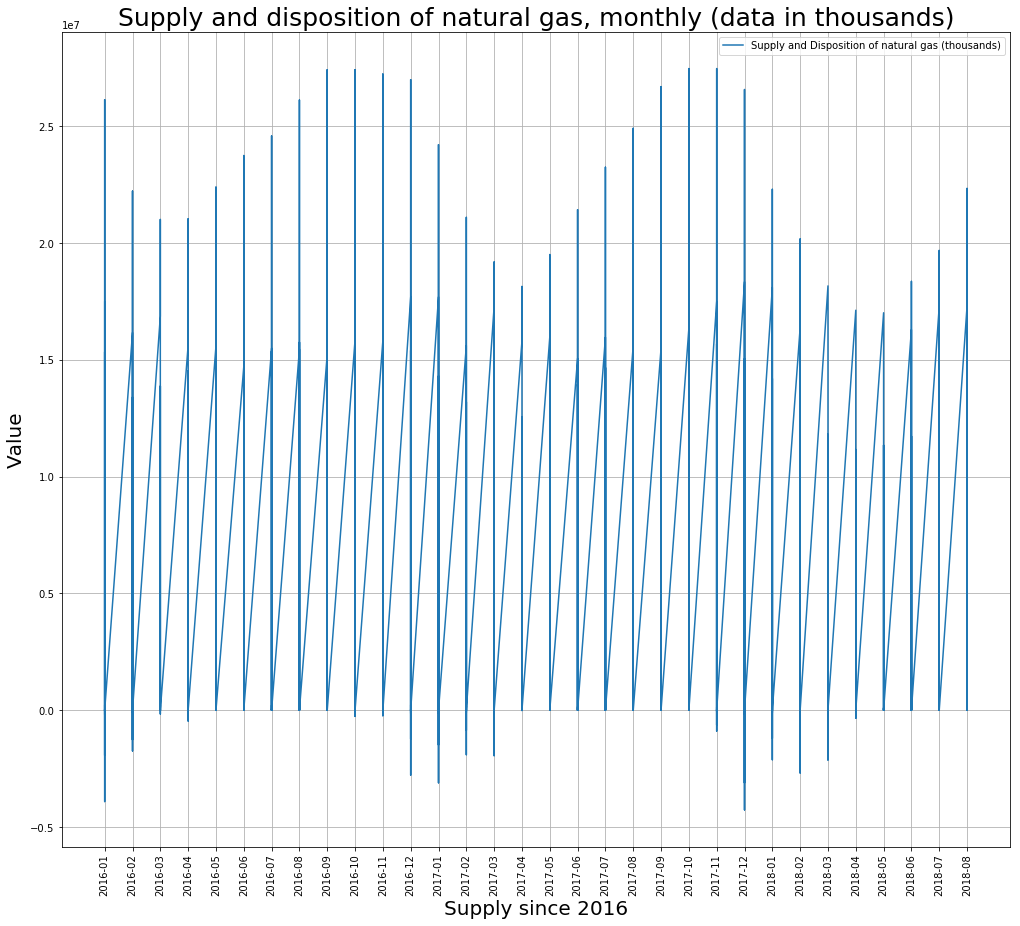

In [125]:
def plot_df(dataframe,labels,xlabel,ylabel,titles,x_data,y_data):

    fig = plt.figure(facecolor='w',figsize=(17,15))
    ax  = fig.add_subplot(111,facecolor = '#ffffff')



    plt.plot(dataframe[x_data],dataframe[y_data],label=labels)
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.title(titles,fontsize=25)
    plt.xticks(rotation=90)
    legend = ax.legend()
    plt.grid(True)

    plt.show()
plot_df(df2, 'Supply and Disposition of natural gas (thousands)','Supply since 2016',\
       'Value','Supply and disposition of natural gas, monthly (data in thousands)',\
       "REF_DATE","VALUE")

<h2 align='center'>Conclusion</h2>

Final remarks on data set and data findings

<h2 align='center'>References</h2>

[1] https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501



![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)